In [ ]:
import	pandas as pd
import numpy as np
import csv


data = pd.read_excel('Inverter_HV2130089610_6487660_20220125000000_20220125235959.xlsx')



In [ ]:
data.head()

,Time range:,2022-01-25 00:00:00 - 2022-01-25 23:59:59,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,Export time:,2022-01-26 06:04:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""N/A"": Not available/Some counters are not rec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Site Name,Management Domain,ManageObject,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV2 input current(A),PV3 input current(A),PV4 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),MPPT 3 DC cumulative energy(kWh),MPPT 4 DC cumulative energy(kWh),MPPT 5 DC cumulative energy(kWh),MPPT 6 DC cumulative energy(kWh),MPPT 7 DC cumulative energy(kWh),MPPT 8 DC cumulative energy(kWh),MPPT 9 DC cumulative energy(kWh),MPPT 10 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh),Accumulated amount of absorbed electricity(kWh)
3,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:00:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:05:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,

In [ ]:
data.columns = data.iloc[2] 

In [ ]:
data.head()

2,Site Name,Management Domain,ManageObject,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV2 input current(A),PV3 input current(A),PV4 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),MPPT 3 DC cumulative energy(kWh),MPPT 4 DC cumulative energy(kWh),MPPT 5 DC cumulative energy(kWh),MPPT 6 DC cumulative energy(kWh),MPPT 7 DC cumulative energy(kWh),MPPT 8 DC cumulative energy(kWh),MPPT 9 DC cumulative energy(kWh),MPPT 10 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh),Accumulated amount of absorbed electricity(kWh)
0,Export time:,2022-01-26 06:04:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""N/A"": Not available/Some counters are not rec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Site Name,Management Domain,ManageObject,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV2 input current(A),PV3 input current(A),PV4 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC

In [ ]:
df = data.iloc[3:]

In [ ]:
df.head()

2,Site Name,Management Domain,ManageObject,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV2 input current(A),PV3 input current(A),PV4 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),MPPT 3 DC cumulative energy(kWh),MPPT 4 DC cumulative energy(kWh),MPPT 5 DC cumulative energy(kWh),MPPT 6 DC cumulative energy(kWh),MPPT 7 DC cumulative energy(kWh),MPPT 8 DC cumulative energy(kWh),MPPT 9 DC cumulative energy(kWh),MPPT 10 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh),Accumulated amount of absorbed electricity(kWh)
3,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:00:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:05:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:10:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:15:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:20:00,Standby : no sunlight,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,2022/01/24 07:23:57,2022/01/24 16:42:35,192.77,124.71,0,0,0,0,0,0,0,0,307.78,307.78,1,317.48,0


In [ ]:
df.index = pd.Series(pd.to_datetime(df['Start Time']))
df.index

DatetimeIndex(['2022-01-25 00:00:00', '2022-01-25 00:05:00',
               '2022-01-25 00:10:00', '2022-01-25 00:15:00',
               '2022-01-25 00:20:00', '2022-01-25 00:25:00',
               '2022-01-25 00:30:00', '2022-01-25 00:35:00',
               '2022-01-25 00:40:00', '2022-01-25 00:45:00',
               ...
               '2022-01-25 23:10:00', '2022-01-25 23:15:00',
               '2022-01-25 23:20:00', '2022-01-25 23:25:00',
               '2022-01-25 23:30:00', '2022-01-25 23:35:00',
               '2022-01-25 23:40:00', '2022-01-25 23:45:00',
               '2022-01-25 23:50:00', '2022-01-25 23:55:00'],
              dtype='datetime64[ns]', name='Start Time', length=288, freq=None)

In [ ]:
df.head()

2,Site Name,Management Domain,ManageObject,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV2 input current(A),PV3 input current(A),PV4 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),MPPT 3 DC cumulative energy(kWh),MPPT 4 DC cumulative energy(kWh),MPPT 5 DC cumulative energy(kWh),MPPT 6 DC cumulative energy(kWh),MPPT 7 DC cumulative energy(kWh),MPPT 8 DC cumulative energy(kWh),MPPT 9 DC cumulative energy(kWh),MPPT 10 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh),Accumulated amount of absorbed electricity(kWh)
Start Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-25 00:00:00,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:00:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-01-25 00:05:00,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:05:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-01-25 00:10:00,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:10:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-01-25 00:15:00,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:15:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-01-25 00:20:00,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:20:00,Standby : no sunlight,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,2022/01/24 07:23:57,2022/01/24 16:42:35,192.77,124.71,0,0,0,0,0,0,0,0,307.78,307.78,1,317.48,0


In [ ]:
df.index

DatetimeIndex(['2022-01-25 00:00:00', '2022-01-25 00:05:00',
               '2022-01-25 00:10:00', '2022-01-25 00:15:00',
               '2022-01-25 00:20:00', '2022-01-25 00:25:00',
               '2022-01-25 00:30:00', '2022-01-25 00:35:00',
               '2022-01-25 00:40:00', '2022-01-25 00:45:00',
               ...
               '2022-01-25 23:10:00', '2022-01-25 23:15:00',
               '2022-01-25 23:20:00', '2022-01-25 23:25:00',
               '2022-01-25 23:30:00', '2022-01-25 23:35:00',
               '2022-01-25 23:40:00', '2022-01-25 23:45:00',
               '2022-01-25 23:50:00', '2022-01-25 23:55:00'],
              dtype='datetime64[ns]', name='Start Time', length=288, freq=None)

In [ ]:
df = df.rename( index={'Start Time': 'Datetime'})


In [ ]:
df.head(1)

2,Site Name,Management Domain,ManageObject,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV2 input current(A),PV3 input current(A),PV4 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),MPPT 3 DC cumulative energy(kWh),MPPT 4 DC cumulative energy(kWh),MPPT 5 DC cumulative energy(kWh),MPPT 6 DC cumulative energy(kWh),MPPT 7 DC cumulative energy(kWh),MPPT 8 DC cumulative energy(kWh),MPPT 9 DC cumulative energy(kWh),MPPT 10 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh),Accumulated amount of absorbed electricity(kWh)
Start Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-25,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 00:00:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.78,NaN,NaN,192.77,124.71,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2022-01-25 00:00:00 to 2022-01-25 23:55:00
Data columns (total 80 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Site Name                                        288 non-null    object
 1   Management Domain                                288 non-null    object
 2   ManageObject                                     288 non-null    object
 3   Start Time                                       288 non-null    object
 4   Inverter status                                  281 non-null    object
 5   Grid voltage/Grid AB line voltage(V)             281 non-null    object
 6   BC line voltage(V)                               281 non-null    object
 7   CA line voltage(V)                               281 non-null    object
 8   Phase A voltage(V)                               288 non-null    object
 9   Phase 

In [ ]:
df.describe()

2,Site Name,Management Domain,ManageObject,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV2 input current(A),PV3 input current(A),PV4 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),MPPT 3 DC cumulative energy(kWh),MPPT 4 DC cumulative energy(kWh),MPPT 5 DC cumulative energy(kWh),MPPT 6 DC cumulative energy(kWh),MPPT 7 DC cumulative energy(kWh),MPPT 8 DC cumulative energy(kWh),MPPT 9 DC cumulative energy(kWh),MPPT 10 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh),Accumulated amount of absorbed electricity(kWh)
count,288,288,288,288,281,281.0,281.0,281.0,288.0,288.0,288.0,288.0,288.0,288.0,105.00,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,288.0,288,288.0,288,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,288.00,281,178,288.00,288.00,288,288,281,281,281,281,281,281,281.00,281.00,281.0,281.00,288
unique,1,1,1,288,5,97.0,97.0,100.0,94.0,90.0,95.0,105.0,105.0,104.0,46.00,68.0,6.0,11.0,100.0,19.0,102.0,101.0,64.0,64.0,70.0,70.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,63.0,1,72.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,102.00,2,5,98.00,99.00,1,1,1,1,1,1,1,1,102.00,102.00,103.0,101.00,1
top,Kapitany 1 sor 15kW,/Graboplan2021,HV2130089610,2022-01-25 16:30:00,Standby : no sunlight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,2022/01/25 07:36:21,2022/01/24 16:42:35,192.77,124.71,0,0,0,0,0,0,0,0,307.78,307.78,0.9,327.23,0
freq,288,288,288,1,165,165.0,165.0,165.0,172.0,172.0,172.0,183.0,183.0,183.0,10.00,172.0,183.0,172.0,183.0,200.0,94.0,186.0,172.0,172.0,172.0,172.0,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,200.0,288,198.0,288,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,94.00,193,89,93.00,97.00,288,288,281,281,281,281,281,281,90.00,90.00,71.0,90.00,288


In [ ]:
res = df
for col in df.columns:
    if len(df[col].unique()) == 1:
        res = res.drop(col,axis=1)

In [ ]:
res.describe()

2,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV5 input voltage(V),PV6 input voltage(V),PV7 input voltage(V),PV8 input voltage(V),PV9 input voltage(V),PV10 input voltage(V),PV11 input voltage(V),PV12 input voltage(V),PV13 input voltage(V),PV14 input voltage(V),PV15 Input Voltage(V),PV16 Input Voltage(V),PV17 Input Voltage(V),PV18 Input Voltage(V),PV19 Input Voltage(V),PV20 Input Voltage(V),PV1 input current(A),PV3 input current(A),PV5 input current(A),PV6 input current(A),PV7 input current(A),PV8 input current(A),PV9 input current(A),PV10 input current(A),PV11 input current(A),PV12 input current(A),PV13 input current(A),PV14 input current(A),PV15 Input Current(A),PV16 Input Current(A),PV17 Input Current(A),PV18 Input Current(A),PV19 Input Current(A),PV20 Input Current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),MPPT 5 DC cumulative energy(kWh),MPPT 6 DC cumulative energy(kWh),MPPT 7 DC cumulative energy(kWh),MPPT 8 DC cumulative energy(kWh),MPPT 9 DC cumulative energy(kWh),MPPT 10 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh)
count,288,281,281.0,281.0,281.0,288.0,288.0,288.0,288.0,288.0,288.0,105.00,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,288.0,288.0,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,288.00,281,178,288.00,288.00,281,281,281,281,281,281,281.00,281.00,281.0,281.00
unique,288,5,97.0,97.0,100.0,94.0,90.0,95.0,105.0,105.0,104.0,46.00,68.0,6.0,11.0,100.0,19.0,102.0,101.0,64.0,64.0,70.0,70.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,63.0,72.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,102.00,2,5,98.00,99.00,1,1,1,1,1,1,102.00,102.00,103.0,101.00
top,2022-01-25 16:30:00,Standby : no sunlight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,2022/01/25 07:36:21,2022/01/24 16:42:35,192.77,124.71,0,0,0,0,0,0,307.78,307.78,0.9,327.23
freq,1,165,165.0,165.0,165.0,172.0,172.0,172.0,183.0,183.0,183.0,10.00,172.0,183.0,172.0,183.0,200.0,94.0,186.0,172.0,172.0,172.0,172.0,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,200.0,198.0,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,94.00,193,89,93.00,97.00,281,281,281,281,281,281,90.00,90.00,71.0,90.00


In [ ]:
df_1 = df.drop(columns=df.columns[df.nunique()==1], inplace=True)
df

2,Start Time,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),Phase C voltage(V),Grid current/Grid phase A current(A),Phase B current(A),Phase C current(A),Inverter efficiency(%),Device internal temperature(℃),Power factor,Grid frequency(Hz),Active power(kW),Output reactive power(kvar),Daily energy(kWh),Total input power(kW),PV1 input voltage(V),PV2 input voltage(V),PV3 input voltage(V),PV4 input voltage(V),PV1 input current(A),PV3 input current(A),Cumulative energy(kWh),Inverter startup time,Inverter shutdown time,MPPT 1 DC cumulative energy(kWh),MPPT 2 DC cumulative energy(kWh),Monthly energy(kWh),Annual energy(kWh),Voltage between PV– and the ground(V),Total DC input energy(kWh)
Start Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-25 00:00:00,2022-01-25 00:00:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,NaN,NaN,192.77,124.71,NaN,NaN,NaN,NaN
2022-01-25 00:05:00,2022-01-25 00:05:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,NaN,NaN,192.77,124.71,NaN,NaN,NaN,NaN
2022-01-25 00:10:00,2022-01-25 00:10:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,NaN,NaN,192.77,124.71,NaN,NaN,NaN,NaN
2022-01-25 00:15:00,2022-01-25 00:15:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,NaN,NaN,192.77,124.71,NaN,NaN,NaN,NaN
2022-01-25 00:20:00,2022-01-25 00:20:00,Standby : no sunlight,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,307.78,2022/01/24 07:23:57,2022/01/24 16:42:35,192.77,124.71,307.78,307.78,1,317.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25 23:35:00,2022-01-25 23:35:00,Standby : no sunlight,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,9.62,0,0,0,0,0,0,0,317.4,2022/01/25 07:36:21,2022/01/25 16:32:36,197.59,129.64,317.4,317.4,0.9,327.23
2022-01-25 23:40:00,2022-01-25 23:40:00,Standby : no sunlight,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,9.62,0,0,0,0,0,0,0,317.4,2022/01/25 07:36:21,2022/01/25 16:32:36,197.59,129.64,317.4,317.4,0.9,327.23
2022-01-25 23:45:00,2022-01-25 23:45:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,9.62,0,0,0,0,0,0,0,317.4,NaN,NaN,197.59,129.64,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Start Time', 'Inverter status', 'Grid voltage/Grid AB line voltage(V)',
       'BC line voltage(V)', 'CA line voltage(V)', 'Phase A voltage(V)',
       'Phase B voltage(V)', 'Phase C voltage(V)',
       'Grid current/Grid phase A current(A)', 'Phase B current(A)',
       'Phase C current(A)', 'Inverter efficiency(%)',
       'Device internal temperature(℃)', 'Power factor', 'Grid frequency(Hz)',
       'Active power(kW)', 'Output reactive power(kvar)', 'Daily energy(kWh)',
       'Total input power(kW)', 'PV1 input voltage(V)', 'PV2 input voltage(V)',
       'PV3 input voltage(V)', 'PV4 input voltage(V)', 'PV1 input current(A)',
       'PV3 input current(A)', 'Cumulative energy(kWh)',
       'Inverter startup time', 'Inverter shutdown time',
       'MPPT 1 DC cumulative energy(kWh)', 'MPPT 2 DC cumulative energy(kWh)',
       'Monthly energy(kWh)', 'Annual energy(kWh)',
       'Voltage between PV– and the ground(V)', 'Total DC input energy(kWh)'],
      dtype='object', name=2)

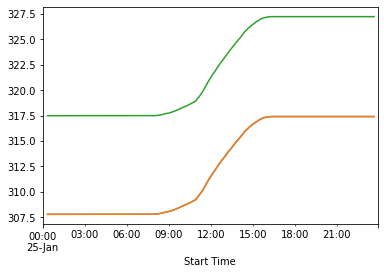

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(26, 14), dpi=80)

df['Monthly energy(kWh)'].plot(label="Monthly Energy")
df['Annual energy(kWh)'].plot(label="Annual energy")
df['Total DC input energy(kWh)'].plot(label="Total energy")
#df['Monthly energy(kWh)'].plot()

#result.Blower_Temp.plot(label="Blower_Temp")

import matplotlib.pyplot as plt

plt.xlabel('Time', fontsize=18)
plt.ylabel('Energy (kWh)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Irradiation (kW/m²) vs Time (h)', fontsize=30)
#plt.plot(x,y,color='green',linewidth=5, linestyle='dotted')

plt.legend(loc = "upper right", fontsize=16)
plt.grid()
plt.savefig("Irradiation (kW per m²) vs Time (h).png")

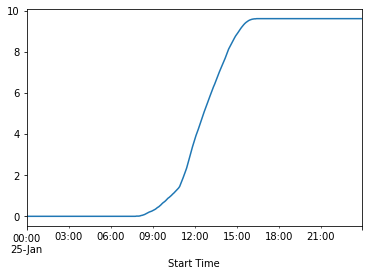

In [ ]:

df['Daily energy(kWh)'].plot()

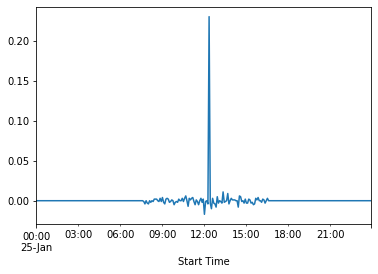

In [ ]:
df['Output reactive power(kvar)'].plot()

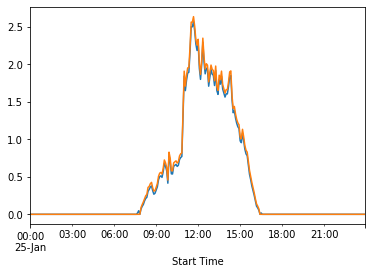

In [ ]:
df['Active power(kW)'].plot()
df['Total input power(kW)'].plot()


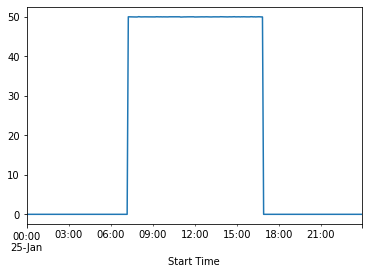

In [ ]:
df['Grid frequency(Hz)'].plot()


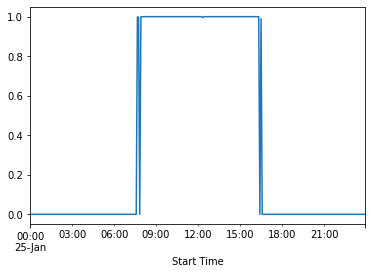

In [ ]:
df['Power factor'].plot()


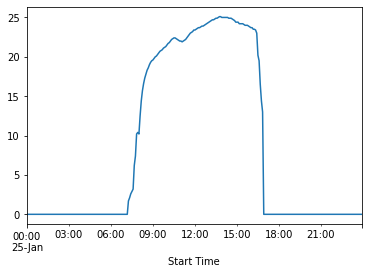

In [ ]:
df['Device internal temperature(℃)'].plot()


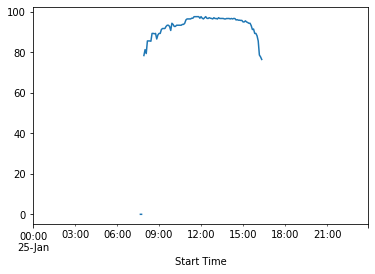

In [ ]:
df['Inverter efficiency(%)'].plot()


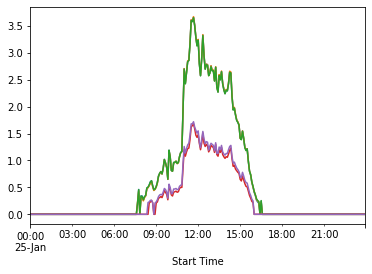

In [ ]:
df['Grid current/Grid phase A current(A)'].plot()
df['Phase B current(A)'].plot()
df['Phase C current(A)'].plot()
df['PV1 input current(A)'].plot()
df['PV3 input current(A)'].plot()

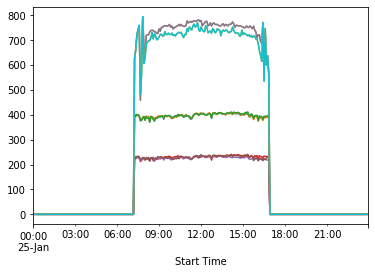

In [ ]:
df['Grid voltage/Grid AB line voltage(V)'].plot()
df['BC line voltage(V)'].plot()
df['CA line voltage(V)'].plot()
df['Phase A voltage(V)'].plot()
df['Phase B voltage(V)'].plot()
df['Phase C voltage(V)'].plot()
df['PV1 input voltage(V)'].plot()
df['PV2 input voltage(V)'].plot()
df['PV3 input voltage(V)'].plot()
df['PV4 input voltage(V)'].plot()

In [ ]:
df_1.head()

AttributeError: ignored

# New Section